In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Датасет - рейтинги компьютерных игр

Вам нужно построить логистическую регрессию для предсказания рейтинга игры по специальной шкале (будем считать для простоты, что рейтинги закодированы определенным образом). Распределение значений таргета Rating представлено ниже.

In [7]:
df_sales = pd.read_csv('video_games_sales.csv')

#### Распределение таргета

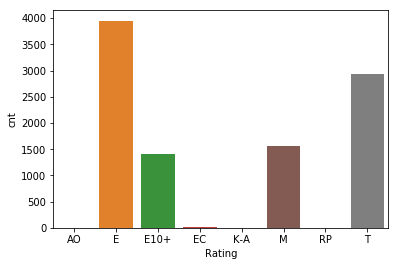

In [8]:
df_sales_gr = df_sales.groupby('Rating').agg({'User_Score': 'count'})
sns.barplot(x='Rating', y='cnt', data=pd.DataFrame(np.concatenate((np.array(df_sales_gr.index).reshape(-1, 1), df_sales_gr.values), axis=1), columns=['Rating', 'cnt']))

In [9]:
df_sales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [40]:
df_sales.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Задание 1

Определите, какие из признаков в датасете категориальные, порядковые, непрерывные. Выпишите признак и его тип ниже

#### Категориальные: 
Platform, Genre, Publisher, Developer, Rating
#### Порядковые:
Year_of_Release, Critic_Score, Critic_Count
#### Непрерывные:
NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, User_Score, User_Count

Как распределяются непрерывныеу признаки? Постройте графики их распределений. Проведите тест на нормальность распределения для двух выбранных вами признаков. Какое получилось p-value? Что это значит?

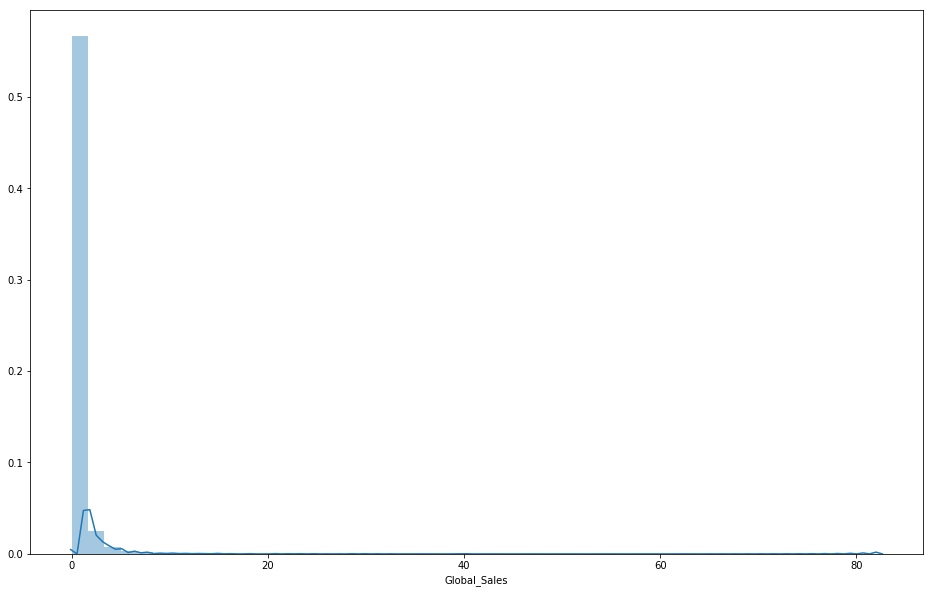

In [27]:
plt.figure(figsize=(16,10))
sns.distplot(df_sales['Global_Sales'])

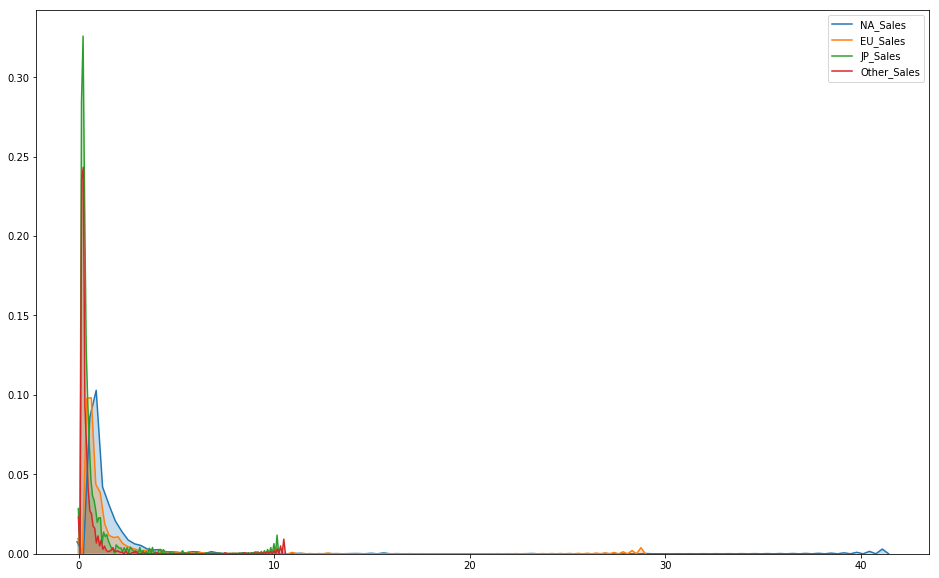

In [28]:
plt.figure(figsize=(16,10))
sns.kdeplot(df_sales['NA_Sales'], shade=True)
sns.kdeplot(df_sales['EU_Sales'], shade=True)
sns.kdeplot(df_sales['JP_Sales'], shade=True)
sns.kdeplot(df_sales['Other_Sales'], shade=True)

In [29]:
from scipy import stats

In [32]:
stats.normaltest(df_sales['NA_Sales'])

NormaltestResult(statistic=35816.697354207376, pvalue=0.0)

In [34]:
stats.normaltest(df_sales['Global_Sales'])

NormaltestResult(statistic=34668.176169688326, pvalue=0.0)

pvalue = 0 означет, что распределение не является нормальным

## Задание 2

1. Как вы можете видеть, некоторые признаки имеют пропуски. Вам необходимо заполнить данные пропуски несколькими различными способами (среднее, медиана, мода). Заодно вспоминаем, что означает каждый из терминов!  
2. Просто выбросите те строки, в которых есть хотя бы одно значение типа NaN. Сколько осталось строк после этого преобразования? Стоит ли применять подобный подход в данном случае?
3. Отдельно прошу подумать над случаями, когда NaN стоит в целевом параметре. Что будете делать с этими строками?

In [45]:
df_sales.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [49]:
df_sales.fillna(df_sales.mean())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,NaN,162.229908,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,NaN,162.229908,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,68.967679,26.360821,NaN,162.229908,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,8.5,431.000000,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,6.6,129.000000,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,8.4,594.000000,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,68.967679,26.360821,NaN,162.229908,NaN,NaN


In [51]:
df_sales.fillna(df_sales.median())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,21.0,NaN,24.0,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,21.0,NaN,24.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.0,21.0,NaN,24.0,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,71.0,21.0,NaN,24.0,NaN,NaN


In [63]:
df_sales.fillna(df_sales.mode())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


## Задание 3

Теперь преобразуйте категориальные признаки в такой вид, который можно корректно подать на вход классификатору типа "Логистическая регрессия".

In [39]:
## Ваш код

## Задание 4

Нормализуйте непрерывные признаки с помощью функции StandardScaler (или RobustScaler, на выбор).
Используя функцию `cross_val_score` модуля `model_selection`, обучите логистическую регрессию. Для функции потерь можно использовать всё тот же `neg_log_loss`

In [ ]:
## Ваш код

## Задание 5

Обучите теперь просто на всем датасете логистическую регрессию разово (без использования `cross_val_score`). Определите по итогам обучения Логистической регрессии, какие из признаков являются самыми важными, а какие менее важными. Постройте график важности признаков (как строили на уроке).

In [ ]:
## Ваш код

## Интересные ссылки (для тех, кто хочет знать еще больше!)

Приведу вам парочку просто интересных ссылок (которые, впрочем, расширяют кругозор знаний, но вряд ли помогут с выполнением домашки):
https://github.com/alicezheng/feature-engineering-book/blob/master/07.00_Swiss_roll.ipynb
https://habr.com/ru/company/mailru/blog/346942/